<a href="https://www.kaggle.com/code/amoschew95/unlocking-the-spirits-of-iowa?scriptVersionId=158627477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Iowa Liquor sales analysis

* Amos Chew: N01533575
* Leon Czarlinski: N01541167
* Oluwole Obisanya: N01510754

In this project we will explore the dataset "Iowa Liquor Sales", that contains every whole sale purchase of liquor in the state of Iowa by retailers for sale to individuals. 

This of this project that could be implemented by a company interested on understanding consumer behaviour, when it commes to liquor consumption. Some questions that could be answered here are: "What stores have sold the most liters of liquor?", or "What is the most popular consumed liquor in Iowa?". 

By the end of this notebook, we will go through the data set, analysis, visualizations, and clusterization. 

# Task 1: Understand the problem statement

It is allways important to remember that before getting into the analysis, it is important to follow 3 important steps, considering the **data analysis life cycle**. Those steps are: **ask, prepare, preocess**. After that we can start with the **analysis**, followed by **sharing**, and eventually **acting** on it. 
The **ask** phase focus on determing the questions that will help drive the analysis. Those questions are meant to be related to the data-driven decision making out of the outputs of the analysys. For this project, the questions that we want to answer are:
* What is the most popular consumed liquor in Iowa?
* What stores have sold the most liquor?
* What cities have the most consumption of liquors?
* Is there a seasonal consuption behavior?
* How many clusters can be created given the features of each store?
* How can we predict sales by zipcode given the dataset?

# Task 2: Import libraries and prepare the dataset

In this phase, we focus on **preparing** and **processing** the data. 

The data was downloaded from the IOWA database website and uploaded here at Kaggle. Before being uploaded we did some data treatments, like filtering sales above 0, and selecting only the year of 2022. Even so, it is important to do some checks, before analysing it. To work with the data frame, we are going to import some libraries, such as pandas (used for data manipulation), numpy (used for numerical analysis), and matplotlib (used for data visualization).

We are going to do some checks about the data frame to see if there are some information we need to be aware of it. 

In [1]:
#Data
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px

#Scaler
from sklearn.preprocessing import StandardScaler

#Kmeans
from sklearn.cluster import KMeans

#Evaluating scores
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

#Linear regression
from sklearn.linear_model import LinearRegression

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#cd to directory with file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iowa-liquor-sales/Iowa_Liquor_Sales2022.csv


In [2]:
df = pd.read_csv('/kaggle/input/iowa-liquor-sales/Iowa_Liquor_Sales2022.csv')
df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Iowa ZIP Code Tabulation Areas,Iowa Watershed Sub-Basins (HUC 08),Iowa Watersheds (HUC 10),County Boundaries of Iowa,US Counties
0,INV-43468500020,01/02/2022,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT (-93.619788 41.605706),77.0,POLK,...,12.00,2,24.00,1.50,0.39,432.0,25.0,316.0,64.0,1878.0
1,INV-43468400011,01/02/2022,2536,HY-VEE / PLEASANT HILL,4815 MAPLE DRIVE,PLEASANT HILL,50317.0,POINT (-93.519491 41.598133),77.0,POLK,...,11.25,12,135.00,9.00,2.37,480.0,29.0,342.0,64.0,1878.0
2,INV-43468500021,01/02/2022,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT (-93.619788 41.605706),77.0,POLK,...,12.00,3,36.00,2.25,0.59,432.0,25.0,316.0,64.0,1878.0
3,INV-43468500039,01/02/2022,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT (-93.619788 41.605706),77.0,POLK,...,18.60,2,37.20,1.50,0.39,432.0,25.0,316.0,64.0,1878.0
4,INV-43468400010,01/02/2022,2536,HY-VEE / PLEASANT HILL,4815 MAPLE DRIVE,PLEASANT HILL,50317.0,POINT (-93.519491 41.598133),77.0,POLK,...,34.50,6,207.00,4.50,1.18,480.0,29.0,342.0,64.0,1878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563477,INV-54529100111,12/30/2022,5916,ANOTHER ROUND / DEWITT,622 S 6TH AVE,DEWITT,52742.0,POINT (-90.53908 41.80942),NaN,CLINTON,...,21.99,12,263.88,21.00,5.54,841.0,9.0,103.0,55.0,1745.0
2563478,INV-54551000003,12/30/2022,6021,CASEY'S GENERAL STORE #2315 / CORYDON,220 N WASHINGTON ST,CORYDON,50060.0,POINT (-93.31801 40.75866),NaN,WAYNE,...,13.47,4,53.88,3.00,0.79,703.0,54.0,531.0,97.0,1887.0
2563479,INV-54528400003,12/30/2022,3868,WAL-MART 3630 / MARION,5491 BUSINESS HWY 151,MARION,52302.0,POINT (-91.55323 42.03567),NaN,LINN,...,12.38,6,74.28,10.50,2.77,443.0,19.0,265.0,45.0,287.0
2563480,INV-54548000013,12/30/2022,4159,FAREWAY STORES #073 / COUNCIL BLUFFS,310 MCKENZIE AVE,COUNCIL BLUFFS,51503.0,POINT (-95.81894 41.28021),NaN,POTTAWATTAMIE,...,20.25,12,243.00,9.00,2.37,817.0,40.0,236.0,69.0,1879.0


In [3]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'Iowa ZIP Code Tabulation Areas', 'Iowa Watershed Sub-Basins (HUC 08)',
       'Iowa Watersheds (HUC 10)', 'County Boundaries of Iowa', 'US Counties'],
      dtype='object')

In [4]:
#Let's drop the columns that don't make sense for this analysis
df.drop(['Address', 'County Number', 'Category', 'Vendor Number', 'Item Number', 'Iowa ZIP Code Tabulation Areas', 'Iowa Watershed Sub-Basins (HUC 08)', 'Iowa Watersheds (HUC 10)','County Boundaries of Iowa', 'US Counties'], axis=1, inplace=True)

In [5]:
#convert date columns to datetime data type
df['Date'] = pd.to_datetime(df['Date'])
df['Date']. astype

<bound method NDFrame.astype of 0         2022-01-02
1         2022-01-02
2         2022-01-02
3         2022-01-02
4         2022-01-02
             ...    
2563477   2022-12-30
2563478   2022-12-30
2563479   2022-12-30
2563480   2022-12-30
2563481   2022-12-30
Name: Date, Length: 2563482, dtype: datetime64[ns]>

In [6]:
# Check the dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563482 entries, 0 to 2563481
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   City                   object        
 5   Zip Code               float64       
 6   Store Location         object        
 7   County                 object        
 8   Category Name          object        
 9   Vendor Name            object        
 10  Item Description       object        
 11  Pack                   int64         
 12  Bottle Volume (ml)     int64         
 13  State Bottle Cost      float64       
 14  State Bottle Retail    float64       
 15  Bottles Sold           int64         
 16  Sale (Dollars)         float64       
 17  Volume Sold (Liters)   float64       
 18  Volume Sold (Gallons) 

In [7]:
#Let's also rename some columns, so it is easy to work with during the analysis
df.rename(columns={
    'Invoice/Item Number': 'Invoice_Number',
    'Store Number': 'Store_Number',
    'Store Name' : 'Store_Name',
    'Zip Code' : 'Zip_Code',
    'Store Location' : 'Store_Location',
    'Category Name': 'Category_Name',
    'Vendor Name' : 'Vendor_Name',
    'Item Number' : 'Item_Number',
    'Item Description' : 'Item_Description',
    'Bottle Volume (ml)' : 'Bottle_Vol_ml',
    'State Bottle Cost': 'State_Bottle_Cost',
    'State Bottle Retail': 'State_Bottle_Retail',
    'Bottles Sold': 'Bottles_Sold',
    'Sale (Dollars)' : 'Sale_Dollars',
    'Volume Sold (Liters)': 'Volume_Sold_L', 
    'Volume Sold (Gallons)': 'Volume_Sold_G',
}, inplace=True)

In [8]:
# Use a regular expression to extract the longitude and latitude
pattern = r'POINT \((?P<longitude>[-\d.]+) (?P<latitude>[-\d.]+)\)'
df[['longitude', 'latitude']] = df['Store_Location'].str.extract(pattern)

# Convert the longitude and latitude columns to float for further processing
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

In [9]:
#Convert the city to UPPERCASE and strip white spaces, so we can get a better view of the results
df['City'] = df['City'].str.upper().str.strip()

In [10]:
#Let's check how many values are inside the table
df.count()

Invoice_Number         2563482
Date                   2563482
Store_Number           2563482
Store_Name             2563482
City                   2561638
Zip_Code               2561616
Store_Location         2347072
County                 2561638
Category_Name          2563482
Vendor_Name            2563482
Item_Description       2563482
Pack                   2563482
Bottle_Vol_ml          2563482
State_Bottle_Cost      2563482
State_Bottle_Retail    2563482
Bottles_Sold           2563482
Sale_Dollars           2563482
Volume_Sold_L          2563482
Volume_Sold_G          2563482
longitude              2347072
latitude               2347072
dtype: int64

In [11]:
# checking the null values. If I have any null values, we can leave it like that, drop it or fill with mean values
df.isnull().sum()

Invoice_Number              0
Date                        0
Store_Number                0
Store_Name                  0
City                     1844
Zip_Code                 1866
Store_Location         216410
County                   1844
Category_Name               0
Vendor_Name                 0
Item_Description            0
Pack                        0
Bottle_Vol_ml               0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_Dollars                0
Volume_Sold_L               0
Volume_Sold_G               0
longitude              216410
latitude               216410
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.count()

Invoice_Number         2347050
Date                   2347050
Store_Number           2347050
Store_Name             2347050
City                   2347050
Zip_Code               2347050
Store_Location         2347050
County                 2347050
Category_Name          2347050
Vendor_Name            2347050
Item_Description       2347050
Pack                   2347050
Bottle_Vol_ml          2347050
State_Bottle_Cost      2347050
State_Bottle_Retail    2347050
Bottles_Sold           2347050
Sale_Dollars           2347050
Volume_Sold_L          2347050
Volume_Sold_G          2347050
longitude              2347050
latitude               2347050
dtype: int64

In [14]:
#This is the final Data Frame that we are using to work on. 
df

,Invoice_Number,Date,Store_Number,Store_Name,City,Zip_Code,Store_Location,County,Category_Name,Vendor_Name,...,Pack,Bottle_Vol_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G,longitude,latitude
0,INV-43468500020,2022-01-02,2190,"CENTRAL CITY LIQUOR, INC.",DES MOINES,50314.0,POINT (-93.619788 41.605706),POLK,IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,...,12,750,8.00,12.00,2,24.00,1.50,0.39,-93.619788,41.605706
1,INV-43468400011,2022-01-02,2536,HY-VEE / PLEASANT HILL,PLEASANT HILL,50317.0,POINT (-93.519491 41.598133),POLK,BLENDED WHISKIES,DIAGEO AMERICAS,...,12,750,7.50,11.25,12,135.00,9.00,2.37,-93.519491,41.598133
2,INV-43468500021,2022-01-02,2190,"CENTRAL CITY LIQUOR, INC.",DES MOINES,50314.0,POINT (-93.619788 41.605706),POLK,IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,...,12,750,8.00,12.00,3,36.00,2.25,0.59,-93.619788,41.605706
3,INV-43468500039,2022-01-02,2190,"CENTRAL CITY LIQUOR, INC.",DES MOINES,50314.0,POINT (-93.619788 41.605706),POLK,IMPORTED DISTILLED SPIRITS SPECIALTY,CONSTELLATION BRANDS INC,...,12,750,12.40,18.60,2,37.20,1.50,0.39,-93.619788,41.605706
4,INV-43468400010,2022-01-02,2536,HY-VEE / PLEASANT HILL,PLEASANT HILL,50317.0,POINT (-93.519491 41.598133),POLK,TEMPORARY & SPECIALTY PACKAGES,CEDAR RIDGE VINEYARDS LL,...,6,750,23.00,34.50,6,207.00,4.50,1.18,-93.519491,41.598133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563477,INV-54529100111,2022-12-30,5916,ANOTHER ROUND / DEWITT,DEWITT,52742.0,POINT (-90.53908 41.80942),CLINTON,IMPORTED SCHNAPPS,SAZERAC COMPANY INC,...,6,1750,14.66,21.99,12,263.88,21.00,5.54,-90.539080,41.809420
2563478,INV-54551000003,2022-12-30,6021,CASEY'S GENERAL STORE #2315 / CORYDON,CORYDON,50060.0,POINT (-93.31801 40.75866),WAYNE,WHISKEY LIQUEUR,SAZERAC COMPANY INC,...,12,750,8.98,13.47,4,53.88,3.00,0.79,-93.318010,40.758660
2563479,INV-54528400003,2022-12-30,3868,WAL-MART 3630 / MARION,MARION,52302.0,POINT (-91.55323 42.03567),LINN,BLENDED WHISKIES,LAIRD & COMPANY,...,6,1750,8.25,12.38,6,74.28,10.50,2.77,-91.553230,42.035670
2563480,INV-54548000013,2022-12-30,4159,FAREWAY STORES #073 / COUNCIL BLUFFS,COUNCIL BLUFFS,51503.0,POINT (-95.81894 41.28021),POTTAWATTAMIE,BOTTLED IN BOND BOURBON,JIM BEAM BRANDS,...,12,750,13.50,20.25,12,243.00,9.00,2.37,-95.818940,41.280210


# Task 3: perform exploratory data analysis

Now that we have imported the dataset, defined the dataframe, imported libraries, and checked the data, we have achieved the **prepare** and **process** phases, so we can go on and do some **analysis** and **visualizations** based on the questions and insights that we are looking for. 

## Let's check the IOWA map

We aim to produce a map of IOWA showing the number of stores and total sales aggregated by latitude and longitude. The store count will indicate the volume of sales at each location. Meanwhile, the total sales value will provide insights into where sales are concentrated, potentially differing visually. This is because some areas might have fewer but higher-value sales due to pricier liquors, compared to others with more frequent but less expensive transactions.

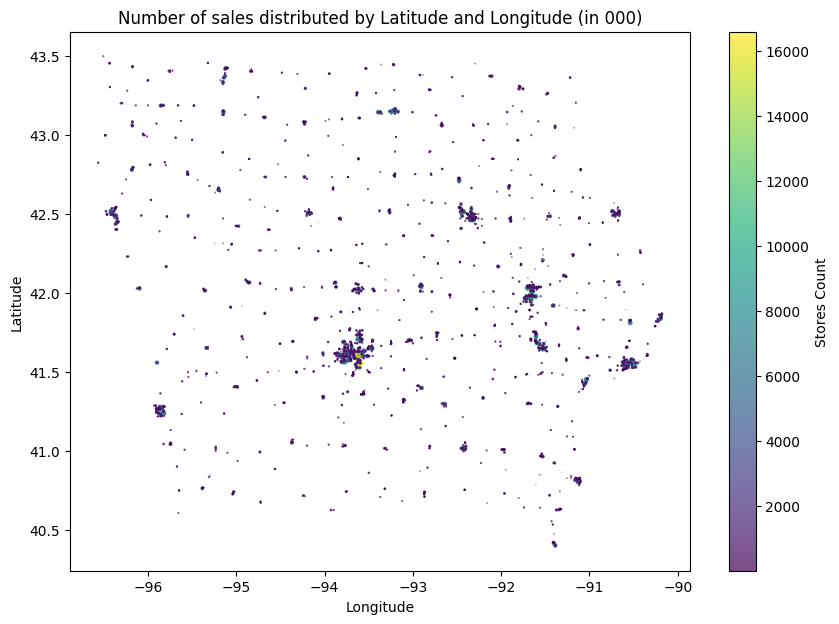

In [15]:
# Group by latitude and longitude and count the Store_name occurrences
df_iowa_store_dist = df.groupby(['latitude', 'longitude'])['Store_Name'].count().reset_index()

#Filter the latitude and longitude extremes for the state of IOWA
df_iowa_store_dist = df_iowa_store_dist[
    (df_iowa_store_dist['longitude'] >= -97) & (df_iowa_store_dist['longitude'] <= -90) &
    (df_iowa_store_dist['latitude'] >= 40) & (df_iowa_store_dist['latitude'] <= 45)
]

plt.figure(figsize=(10, 7))

# Plot the count
plt.scatter(df_iowa_store_dist['longitude'], df_iowa_store_dist['latitude'],
            s=df_iowa_store_dist['Store_Name']/1000,
            c=df_iowa_store_dist['Store_Name'],
            cmap='viridis', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Stores Count')
plt.title('Number of sales distributed by Latitude and Longitude (in 000)')
plt.show()

In [16]:
# Same viz, but plotting a map
# Create the map with Plotly Express
fig = px.scatter_geo(df_iowa_store_dist,
                     lat='latitude',
                     lon='longitude',
                     size='Store_Name',
                     projection='orthographic',
                     title='Number of sales distributed by Latitude and Longitude')

fig.update_geos(
    lataxis_range=[40, 45], # Min and max latitude for Iowa
    lonaxis_range=[-96.6, -90] # Min and max longitude for Iowa
)

# Show the map
fig.show()

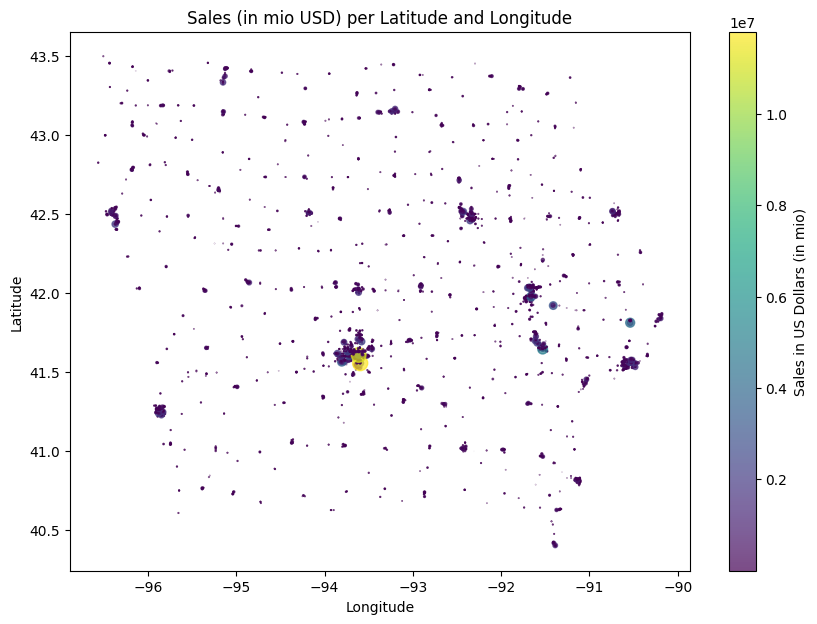

In [17]:
# Group by latitude and longitude and sum the sale in Dollars
df_iowa_sales = df.groupby(['latitude', 'longitude'])['Sale_Dollars'].sum().reset_index()

#Filter the latitude and longitude extremes for the state of IOWA
df_iowa_sales = df_iowa_sales[
    (df_iowa_sales['longitude'] >= -97) & (df_iowa_sales['longitude'] <= -90) &
    (df_iowa_sales['latitude'] >= 40) & (df_iowa_sales['latitude'] <= 45)
]

plt.figure(figsize=(10, 7))

# Plot the value sold by latitude and longitude
plt.scatter(df_iowa_sales['longitude'], df_iowa_sales['latitude'],
            s=df_iowa_sales['Sale_Dollars']/100000,
            c=df_iowa_sales['Sale_Dollars'],
            cmap='viridis', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Sales in US Dollars (in mio)')
plt.title('Sales (in mio USD) per Latitude and Longitude')
plt.show()

## Top 15 categories that has the highest sales

There are 47 categories of drinks sold. We are going to see what are the top 15 categories sold and calculate how much the top 15 represents out of the total

In [18]:
df_cat_sales = df.groupby('Category_Name').agg({
    'Sale_Dollars': 'sum', 
    'Volume_Sold_L': 'sum'
}).reset_index()

total_sales_amount = df_cat_sales['Sale_Dollars'].sum()
unique_cat_count = df['Category_Name'].nunique()

print(f'There are {unique_cat_count} categories. The ammount of sales is {total_sales_amount:,.2f} USD in 2022')

There are 47 categories. The ammount of sales is 396,068,158.39 USD in 2022


In [19]:
#Top 15 categories
df_top15_cat_sales = df_cat_sales.sort_values(by='Sale_Dollars', ascending=False).head(15)
df_top15_cat_sales

,Category_Name,Sale_Dollars,Volume_Sold_L
9,AMERICAN VODKAS,57617578.62,5147966.57
12,CANADIAN WHISKIES,42305849.13,2638336.87
40,STRAIGHT BOURBON WHISKIES,32992294.53,1202298.65
0,100% AGAVE TEQUILA,25704472.54,619054.59
45,WHISKEY LIQUEUR,23594872.59,1039947.97
39,SPICED RUM,19661529.36,1252374.20
43,TENNESSEE WHISKIES,15134485.33,476166.76
42,TEMPORARY & SPECIALTY PACKAGES,14246150.76,421119.91
21,IMPORTED BRANDIES,12440438.09,241815.71
22,IMPORTED CORDIALS & LIQUEURS,11192047.13,340481.81


In [20]:
#Get the total amount sold in the top 15 categories
top15_sales_amount = df_top15_cat_sales['Sale_Dollars'].sum()

#Calculate the percentage
percentage_total = top15_sales_amount/total_sales_amount*100

print(f'The top 15 categories sales amount is {top15_sales_amount:,.2f} and it represents {percentage_total: .2f}% of total sales in 2022')

The top 15 categories sales amount is 305,379,946.97 and it represents  77.10% of total sales in 2022


In [21]:
#Plot in a bar graph the sales by category top15
fig = px.bar(df_top15_cat_sales, x='Category_Name', y='Sale_Dollars', title='Top 15 categories sold 2022 - in Dollars')
fig

In [22]:
#Plot the to 15 volume in liters
df_top15_cat_volume = df_cat_sales.sort_values(by='Volume_Sold_L', ascending=False).head(15)
fig = px.bar(df_top15_cat_volume, x='Category_Name', y='Volume_Sold_L', title='Top 15 categories sold 2022 - in Liters')
fig

In [23]:
top15_cat_volume = df_top15_cat_volume['Volume_Sold_L'].sum()
total_sales_volume = df_cat_sales['Volume_Sold_L'].sum()

percentage_total = top15_cat_volume/total_sales_volume*100

print(f'The top 15 categories sales volume is {top15_cat_volume:,.2f} Liters and it represents {percentage_total: .2f}% of total sales in 2022')

The top 15 categories sales volume is 17,194,533.75 Liters and it represents  79.10% of total sales in 2022


## Monthly and daily sales

Let's check how is the monthly and daily sales to see if there are dates with a certain pattern

In [24]:
# Create a 'month' column based on the 'date' column
df['month'] = df['Date'].dt.month

# Group by 'month' and sum up the 'Sale_Dollars'
df_month_sales = df.groupby('month').agg({'Sale_Dollars': 'sum'}).reset_index()

# Sort the monthly sales by 'month' to ensure the plot goes from January to December
df_month_sales = df_month_sales.sort_values(by='month')

fig_reg = px.bar(df_month_sales, x='month', y='Sale_Dollars')
fig_reg.update_layout(
    title="Total Sales of Liquor per Month",
    xaxis_title="Month",
    yaxis_title="Total Sales in Dollars",
    xaxis=dict(tickvals=list(range(1, 13)), 
               ticktext=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December'])
)

# Show the figure
fig_reg.show()

In [25]:
import plotly.graph_objs as go
from plotly.offline import iplot

df['day'] = df['Date'].dt.day

# Group by 'Date' and sum up the 'Sale (Dollars)'
daily_sales = df.groupby('Date', as_index=False)['Sale_Dollars'].sum()

# Create the scatter plot
daily_sales_sc = go.Scatter(x=daily_sales['Date'], y=daily_sales['Sale_Dollars'], mode='lines+markers')

# Define the layout of the plot
layout = go.Layout(
    title='Daily Sales',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Sales in Dollars'),
)

# Create the figure with data and layout
fig = go.Figure(data=[daily_sales_sc], layout=layout)

iplot(fig)

There are highly significant drop of sales in days like Jan 2, Jan 9, Jan 16, which are sundays. This might indicate that most of the stores are closed on sundays. The highest picks are Feb 10, Feb 16, May 5, Jun 15, Jun 29, Aug 3, Oct 12 and 13 (highest), Dec 7 and Dec 27

# Task 4: perform kmeans


In [26]:
df_store_total_sales = df.groupby('Store_Name').agg({'Sale_Dollars': 'sum', 'Category_Name': 'nunique'}).reset_index()
df_store_total_sales

,Store_Name,Sale_Dollars,Category_Name
0,'DA BOOZE BARN / WEST BEND,123360.95,39
1,10TH HOLE INN & SUITE / GIFT SHOP,4381.08,21
2,173 CRAFT DISTILLERY,7380.00,4
3,1ST STOP BEVERAGE SHOP,640060.89,39
4,218 FUEL EXPRESS,254445.59,38
...,...,...,...
2051,YESWAY STORE # 1029/ CLARION,36518.52,14
2052,YESWAY STORE # 1036/ KANAWHA,14767.71,17
2053,YESWAY STORE #1037/ GRIMES,42200.46,18
2054,YESWAY STORE #1198 / SWEA CITY,37599.64,17


In [27]:
df_store_total_sales = df_store_total_sales
df_store_total_sales.drop(['Store_Name'], axis=1, inplace=True)
df_store_total_sales = df_store_total_sales.sort_values(by='Sale_Dollars', ascending=False)
df_store_total_sales

,Sale_Dollars,Category_Name
990,14194682.64,44
660,13193801.12,44
1204,5819895.58,44
25,5712308.76,44
48,4657529.96,45
...,...,...
1567,1128.48,8
19,1097.77,8
724,1025.14,6
349,870.24,7


In [28]:
wcss = []
for i in range (1,11):
  kmeans_store_total_sales = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
  kmeans_store_total_sales.fit(df_store_total_sales)
  wcss.append(kmeans_store_total_sales.inertia_)

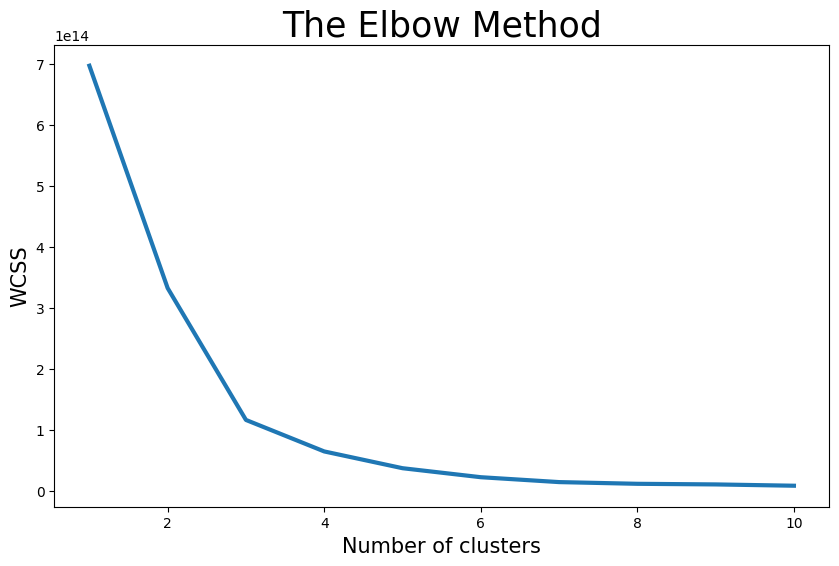

In [29]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show()

In [30]:
kmeans_store_total_sales = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred_store_total_sales = kmeans_store_total_sales.fit_predict(df_store_total_sales)

In [31]:
df_store_total_sales = np.array(df_store_total_sales)
np.set_printoptions(suppress=True)
df_store_total_sales

array([[14194682.64,       44.  ],
       [13193801.12,       44.  ],
       [ 5819895.58,       44.  ],
       ...,
       [    1025.14,        6.  ],
       [     870.24,        7.  ],
       [     702.9 ,        7.  ]])

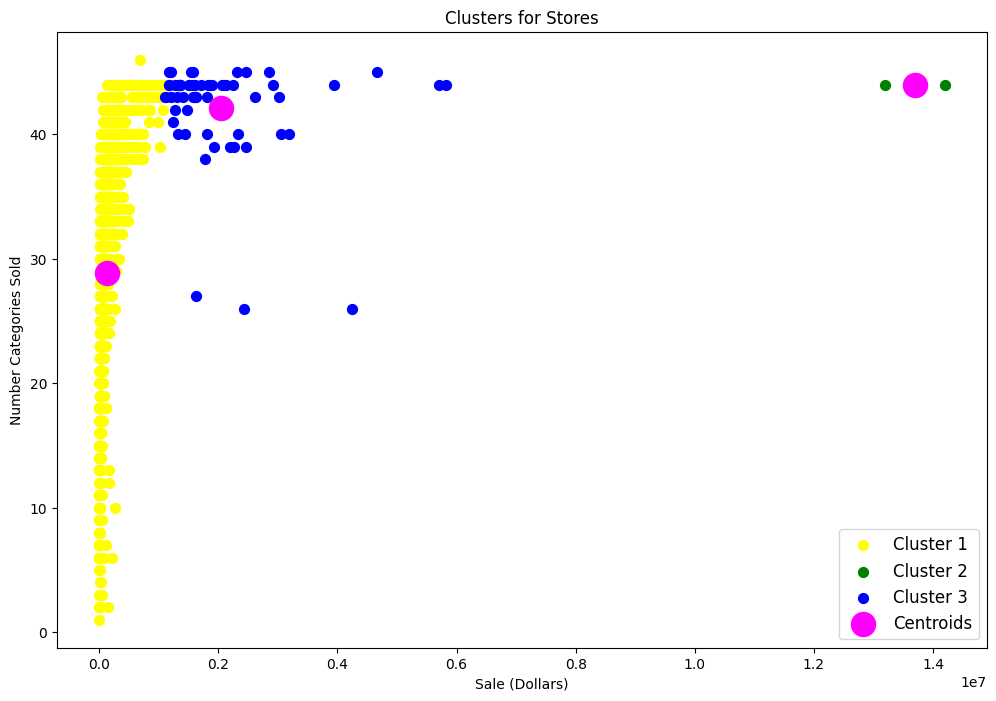

In [32]:
plt.figure(figsize=(12,8))
plt.plot(160, 45)

plt.scatter(df_store_total_sales[y_pred_store_total_sales == 0, 0], df_store_total_sales[y_pred_store_total_sales == 0, 1], s= 50, c='yellow', label = 'Cluster 1')
plt.scatter(df_store_total_sales[y_pred_store_total_sales == 1, 0], df_store_total_sales[y_pred_store_total_sales == 1, 1], s= 50, c='green', label = 'Cluster 2')
plt.scatter(df_store_total_sales[y_pred_store_total_sales == 2, 0], df_store_total_sales[y_pred_store_total_sales == 2, 1], s= 50, c='blue', label = 'Cluster 3')

plt.scatter(kmeans_store_total_sales.cluster_centers_[:,0], kmeans_store_total_sales.cluster_centers_[:,1], s=300, c="magenta", label="Centroids")

plt.title('Clusters for Stores')
plt.xlabel('Sale (Dollars)')
plt.ylabel('Number Categories Sold')
plt.legend(fontsize = 12)
plt.show()

# Task 5: Perform k-means with all numerical features

Select the most relevant numerical features, normalize data, Check performance using the CH index to obtains best possible cluster

In [33]:
df.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G', 'longitude', 'latitude', 'month', 'day'],
      dtype='object')

In [34]:
df_store_kmeans = df[['Store_Number', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G']]
df_store_kmeans = df_store_kmeans.groupby('Store_Number').sum()
df_store_kmeans = df_store_kmeans.reset_index()
df_store_kmeans

,Store_Number,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G
0,2106,58478,943273.57,54796.17,14461.95
1,2130,82629,1433912.33,74957.60,19791.41
2,2190,131210,2368333.33,91073.63,23976.06
3,2191,74055,1338926.82,73529.15,19395.96
4,2200,16956,282191.95,17783.78,4682.27
...,...,...,...,...,...
2006,10100,1372,12860.09,555.69,145.95
2007,10101,165,2213.69,8.25,2.01
2008,10102,1585,21173.73,979.55,255.39
2009,10103,3565,29519.58,1273.77,335.27


In [35]:
df_store_kmeans = df_store_kmeans.drop('Store_Number', axis=1)

In [36]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_store_kmeans.describe()

,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G
count,2011.00,2011.00,2011.00,2011.00
mean,13991.85,196950.85,10809.87,2849.02
std,33067.71,590902.29,31684.38,8364.09
min,11.00,702.90,8.25,2.01
25%,3036.50,34064.91,1686.28,443.08
50%,5966.00,63307.22,3255.70,856.55
75%,13726.50,166179.31,8867.28,2327.06
max,784102.00,14194682.64,729739.06,192694.77


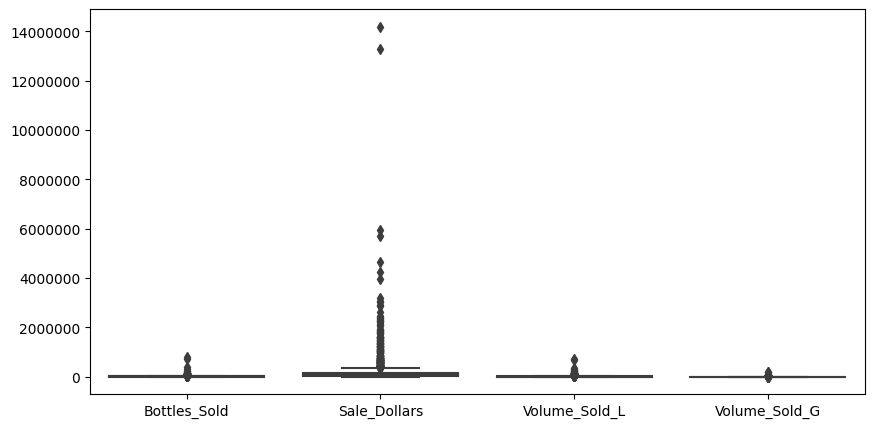

In [37]:
# Identifying outliers

plt.figure(figsize = (10, 5))
outlier = pd.DataFrame(data=df_store_kmeans)

plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(data=outlier)
plt.show()

In [38]:
#df_store_kmeans = df_store_kmeans.drop('Store_Number', axis=1)

sc = StandardScaler()
df_store_kmeans_scaled = sc.fit_transform(df_store_kmeans)
df_store_kmeans_scaled


array([[ 1.34563948,  1.26333636,  1.38860958,  1.38877366],
       [ 2.07617109,  2.09386419,  2.02508857,  2.02611587],
       [ 3.54567363,  3.67560355,  2.53385776,  2.52655196],
       ...,
       [-0.37528862, -0.29754638, -0.31033479, -0.31016779],
       [-0.31539659, -0.28341896, -0.30104652, -0.30061506],
       [-0.418181  , -0.32804288, -0.33448518, -0.33395395]])

In [39]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans_store_scaled = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_store_scaled.fit(df_store_kmeans_scaled)
  wcss.append(kmeans_store_scaled.inertia_)

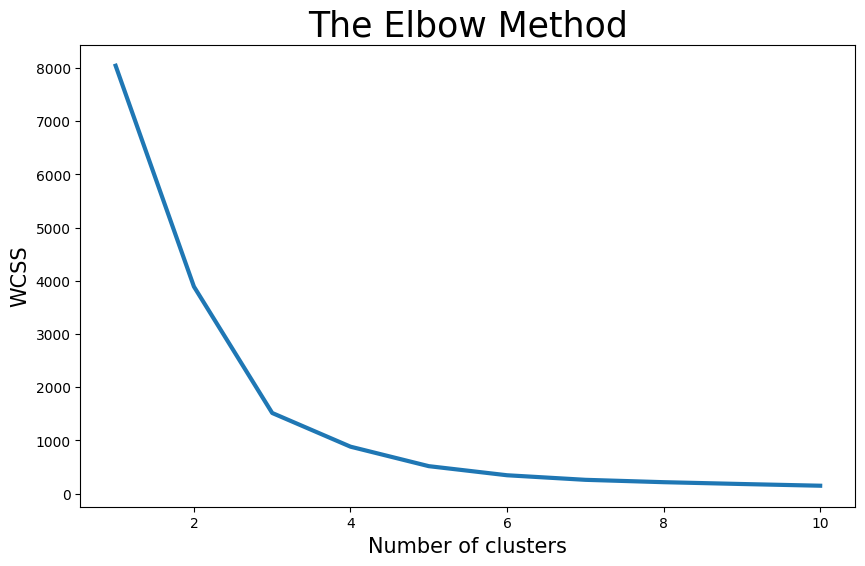

In [40]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15)
plt.show()

In [41]:
kmeans_store_scaled = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_store_scaled.fit(df_store_kmeans_scaled)
y_pred_store_scaled = kmeans_store_scaled.fit_predict(df_store_kmeans_scaled)

ch_score = calinski_harabasz_score(df_store_kmeans_scaled, y_pred_store_scaled)
ch_score

4321.7846504171275

In [42]:
kmeans_store_scaled = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_store_scaled.fit(df_store_kmeans_scaled)
y_pred_store_scaled = kmeans_store_scaled.fit_predict(df_store_kmeans_scaled)

ch_score = calinski_harabasz_score(df_store_kmeans_scaled, y_pred_store_scaled)
ch_score

5424.809268074765

In [43]:
kmeans_store_scaled = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_store_scaled.fit(df_store_kmeans_scaled)
y_pred_store_scaled = kmeans_store_scaled.fit_predict(df_store_kmeans_scaled)

ch_score = calinski_harabasz_score(df_store_kmeans_scaled, y_pred_store_scaled)
ch_score

2142.225665273534

### CH Index between 2 and 20 clusters

The CH index for 2 clusters is 2142.225665273534
The CH index for 3 clusters is 4321.7846504171275
The CH index for 4 clusters is 5424.809268074765
The CH index for 5 clusters is 7303.546566621114
The CH index for 6 clusters is 8927.404720413606
The CH index for 7 clusters is 9998.975628225398
The CH index for 8 clusters is 10390.065279908173
The CH index for 9 clusters is 10856.84754319938
The CH index for 10 clusters is 11774.059260634594
The CH index for 11 clusters is 11696.613690649963
The CH index for 12 clusters is 11891.748937314458
The CH index for 13 clusters is 12275.882079443389
The CH index for 14 clusters is 12291.017149264193
The CH index for 15 clusters is 12207.39774299678
The CH index for 16 clusters is 12019.366998345104
The CH index for 17 clusters is 12350.06703552535
The CH index for 18 clusters is 12839.998764358244
The CH index for 19 clusters is 12842.59625512341
The CH index for 20 clusters is 13354.269031343414


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

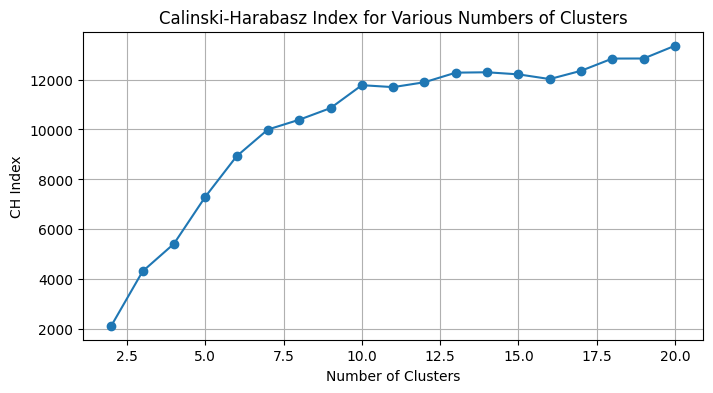

In [44]:
# A list to hold the Calinski-Harabasz index values
ch_scores = []
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    # Perform k-means clustering
    kmeans_store_scaled = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_store_scaled.fit(df_store_kmeans_scaled)
    
    # Get the y predict
    y_pred_store_scaled = kmeans_store_scaled.fit_predict(df_store_kmeans_scaled)
    
    # Calculate the CH index
    ch_score = calinski_harabasz_score(df_store_kmeans_scaled, y_pred_store_scaled)
    ch_scores.append(ch_score)
    print(f"The CH index for {n_clusters} clusters is {ch_score}")

# Now plot the CH index for each number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('CH Index')
plt.grid(True)
plt

The CH index continues to increase with the number of clusters. This is not uncommon since by adding more clusters, we're increasing the likelihood that each point is closer to its cluster centroid (higher separation), but beyond a certain point, you might just be over-segmenting the data.

The silhouette score for 2 clusters is 0.98
The silhouette score for 3 clusters is 0.89
The silhouette score for 4 clusters is 0.88
The silhouette score for 5 clusters is 0.73
The silhouette score for 6 clusters is 0.73
The silhouette score for 7 clusters is 0.55
The silhouette score for 8 clusters is 0.55
The silhouette score for 9 clusters is 0.53
The silhouette score for 10 clusters is 0.53
The silhouette score for 11 clusters is 0.53
The silhouette score for 12 clusters is 0.54
The silhouette score for 13 clusters is 0.54
The silhouette score for 14 clusters is 0.54
The silhouette score for 15 clusters is 0.52
The silhouette score for 16 clusters is 0.52
The silhouette score for 17 clusters is 0.52
The silhouette score for 18 clusters is 0.52
The silhouette score for 19 clusters is 0.52
The silhouette score for 20 clusters is 0.52


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

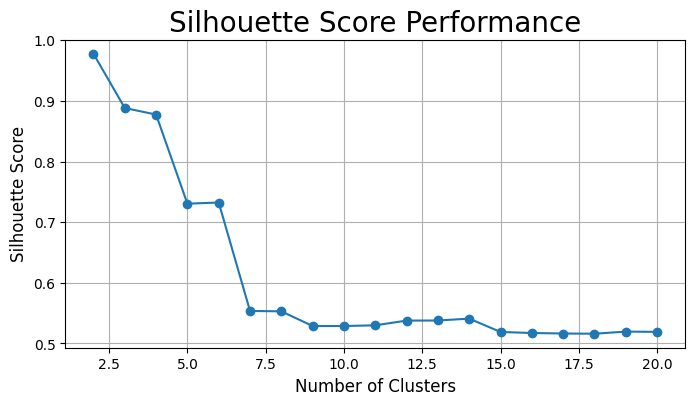

In [45]:
silhouette_scores = []

for n_clusters in cluster_range:
    # Apply Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hc.fit_predict(df_store_kmeans_scaled)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(df_store_kmeans_scaled, y_pred)
    silhouette_scores.append(silhouette)
    print(f"The silhouette score for {n_clusters} clusters is {silhouette:.2f}")

# Now plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score Performance', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt

The silhouette score starts high and decreases as the number of clusters increases. This indicates that at a lower number of clusters, the data points are better matched to their own clusters. As you increase the number of clusters, the distinctness of each cluster becomes less clear.

In interpreting these results together we found that that there's a 'sweet spot' where both scores indicate a reasonable number of clusters that provide distinct, dense groups without overfitting. It's common to look for a balance between the CH index leveling off and the silhouette score starting to decline, which often suggests an optimal number of clusters, and that number is **SIX** clusters

## Removing outliers to check for clusterization performance

We decided to take away stores with sales above 180k, reduncing the number of stores to check if the CH index and the silhouette improves.

In [46]:
df.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G', 'longitude', 'latitude', 'month', 'day'],
      dtype='object')

In [47]:
df_store_kmeans_filtered = df[['Store_Number', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G']]
df_store_kmeans_filtered = df_store_kmeans_filtered.groupby('Store_Number').sum()
df_store_kmeans_filtered = df_store_kmeans_filtered.reset_index()
df_store_kmeans_filtered = df_store_kmeans_filtered = df_store_kmeans_filtered[df_store_kmeans_filtered['Sale_Dollars'] <= 180000]

df_store_kmeans_filtered.describe()

,Store_Number,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G
count,1539.00,1539.00,1539.00,1539.00,1539.00
mean,5388.06,5628.98,58603.91,3100.74,815.74
std,1367.07,4696.75,42346.21,2472.85,651.18
min,2459.00,11.00,702.90,8.25,2.01
25%,4639.00,2452.00,26788.30,1343.07,352.98
50%,5379.00,4544.00,48612.18,2514.50,661.83
75%,5931.50,7288.50,79176.65,4106.76,1077.36
max,10106.00,34295.00,179813.70,13261.00,3492.95


In [48]:
sc = StandardScaler()
df_store_kmeans_filtered = df_store_kmeans_filtered.drop('Store_Number', axis=1)
df_store_kmeans_filtered_scaled = sc.fit_transform(df_store_kmeans_filtered)
df_store_kmeans_filtered_scaled

array([[ 0.71264316,  1.3416792 ,  2.03313905,  2.03271058],
       [-0.48091074,  0.23414741,  0.03620751,  0.03885145],
       [ 0.8934653 ,  2.39595161,  2.51309742,  2.51470363],
       ...,
       [-0.86129747, -0.88419594, -0.85807135, -0.86079927],
       [-0.43959213, -0.68704575, -0.73905261, -0.73808891],
       [-1.16330665, -1.30977896, -1.1675314 , -1.16634625]])

In [49]:
wcss = []
for i in range (1,11):
  kmeans_store_filterd_scaled = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_store_filterd_scaled.fit(df_store_kmeans_filtered_scaled)
  wcss.append(kmeans_store_filterd_scaled.inertia_)

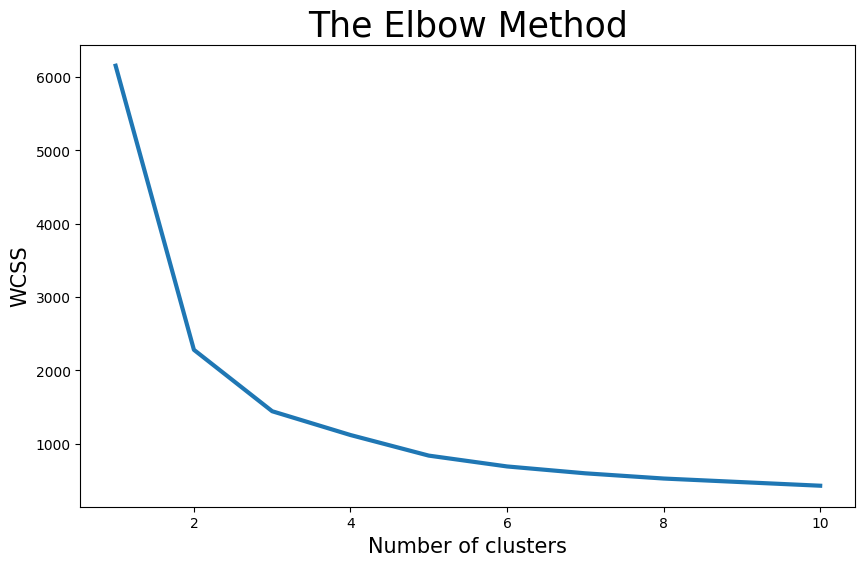

In [50]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15)
plt.show()

The CH index for 2 clusters is 2610.9409258992555
The CH index for 3 clusters is 2508.411551748068
The CH index for 4 clusters is 2304.2274608789653
The CH index for 5 clusters is 2434.5084796755127
The CH index for 6 clusters is 2428.6575089810704
The CH index for 7 clusters is 2380.70541867977
The CH index for 8 clusters is 2344.8635212131458
The CH index for 9 clusters is 2281.863264758021
The CH index for 10 clusters is 2279.0215199790523
The CH index for 11 clusters is 2200.5207411026736
The CH index for 12 clusters is 2144.9395883892794
The CH index for 13 clusters is 2109.8875597512324
The CH index for 14 clusters is 2089.378250584311
The CH index for 15 clusters is 2019.9000838579918
The CH index for 16 clusters is 2004.6789282274121
The CH index for 17 clusters is 1987.5051189635878
The CH index for 18 clusters is 1937.7346927295832
The CH index for 19 clusters is 1885.214505239817
The CH index for 20 clusters is 1900.6451207649259


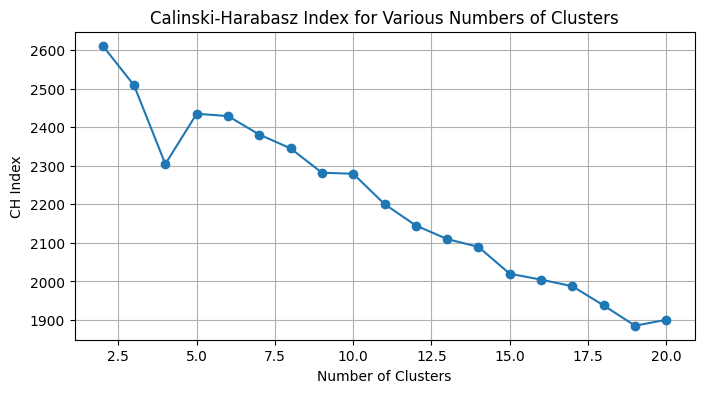

In [51]:
# A list to hold the Calinski-Harabasz index values
ch_scores_filter = []
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    # Perform k-means clustering
    kmeans_store_filterd_scaled = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_store_filterd_scaled.fit(df_store_kmeans_filtered_scaled)
    
    # Get the y predict
    y_pred_store_filter_scaled = kmeans_store_filterd_scaled.fit_predict(df_store_kmeans_filtered_scaled)
    
    # Calculate the CH index
    ch_score_filter = calinski_harabasz_score(df_store_kmeans_filtered_scaled, y_pred_store_filter_scaled)
    ch_scores_filter.append(ch_score_filter)
    print(f"The CH index for {n_clusters} clusters is {ch_score_filter}")

# Now plot the CH index for each number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, ch_scores_filter, marker='o')
plt.title('Calinski-Harabasz Index for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('CH Index')
plt.grid(True)
plt.show()

The silhouette score for 2 clusters is 0.61
The silhouette score for 3 clusters is 0.45
The silhouette score for 4 clusters is 0.44
The silhouette score for 5 clusters is 0.45
The silhouette score for 6 clusters is 0.38
The silhouette score for 7 clusters is 0.34
The silhouette score for 8 clusters is 0.34
The silhouette score for 9 clusters is 0.34
The silhouette score for 10 clusters is 0.34
The silhouette score for 11 clusters is 0.34
The silhouette score for 12 clusters is 0.34
The silhouette score for 13 clusters is 0.35
The silhouette score for 14 clusters is 0.35
The silhouette score for 15 clusters is 0.31
The silhouette score for 16 clusters is 0.31
The silhouette score for 17 clusters is 0.31
The silhouette score for 18 clusters is 0.28
The silhouette score for 19 clusters is 0.29
The silhouette score for 20 clusters is 0.29


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

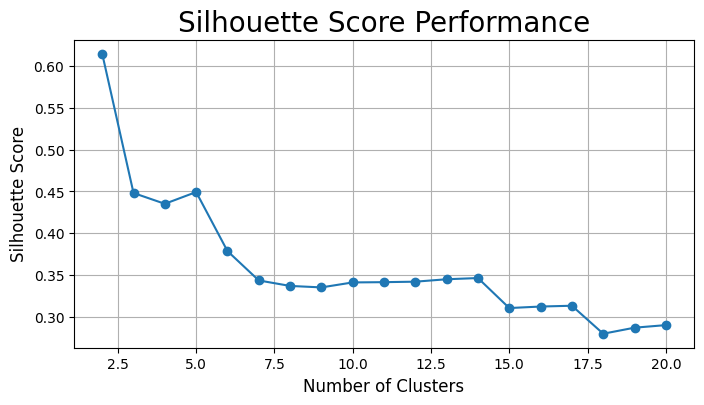

In [52]:
silhouette_scores_filter = []

for n_clusters in cluster_range:
    # Apply Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred_filter = hc.fit_predict(df_store_kmeans_filtered_scaled)
    
    # Calculate the silhouette score
    silhouette_filter = silhouette_score(df_store_kmeans_filtered_scaled, y_pred_filter)
    silhouette_scores_filter.append(silhouette_filter)
    print(f"The silhouette score for {n_clusters} clusters is {silhouette_filter:.2f}")

# Now plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores_filter, marker='o', linestyle='-')
plt.title('Silhouette Score Performance', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt

# Task 6: Fitting a MLR Model

In [53]:
df.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G', 'longitude', 'latitude', 'month', 'day'],
      dtype='object')

In [54]:
df_zip_sales = df[['Zip_Code', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G']]
df_zip_sales = df_zip_sales.groupby('Zip_Code').sum()
df_zip_sales = df_zip_sales.reset_index()
df_zip_sales

,Zip_Code,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G
0,50002.00,1527,21366.85,981.32,257.78
1,50003.00,60781,865555.51,44009.13,11588.65
2,50005.00,3567,39305.10,1928.81,507.97
3,50006.00,6119,96093.85,5726.24,1508.74
4,50008.00,1118,54170.02,864.12,226.28
...,...,...,...,...,...
481,52804.00,288705,3056388.71,161695.50,42590.23
482,52806.00,235974,2875812.42,154900.99,40821.21
483,52807.00,518939,8966983.80,523878.04,138214.50
484,56201.00,798,9568.65,538.00,141.68


In [55]:
num_stores_zip = df[['Zip_Code','Store_Name']]
num_stores_zip = df.groupby('Zip_Code')['Store_Name'].nunique().to_frame().sort_values('Store_Name')
num_stores_zip = num_stores_zip.reset_index()
num_stores_zip.rename(columns={
    'Store_Name':'Store_Count'
}, inplace=True)
num_stores_zip.head()

,Zip_Code,Store_Count
0,57222.00,1
1,52154.00,1
2,50514.00,1
3,52151.00,1
4,50529.00,1


In [56]:
df_zip_sales = pd.merge(df_zip_sales,num_stores_zip, how='inner', on="Zip_Code")
df_zip_sales.head()

,Zip_Code,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G,Store_Count
0,50002.00,1527,21366.85,981.32,257.78,2
1,50003.00,60781,865555.51,44009.13,11588.65,5
2,50005.00,3567,39305.10,1928.81,507.97,1
3,50006.00,6119,96093.85,5726.24,1508.74,2
4,50008.00,1118,54170.02,864.12,226.28,1


In [57]:
df_zip_sales.shape

(486, 6)

In [58]:
df_zip_sales['Sales_by_zip'] = df_zip_sales['Sale_Dollars']/df_zip_sales['Store_Count']
df_zip_sales.head()

,Zip_Code,Bottles_Sold,Sale_Dollars,Volume_Sold_L,Volume_Sold_G,Store_Count,Sales_by_zip
0,50002.00,1527,21366.85,981.32,257.78,2,10683.42
1,50003.00,60781,865555.51,44009.13,11588.65,5,173111.10
2,50005.00,3567,39305.10,1928.81,507.97,1,39305.10
3,50006.00,6119,96093.85,5726.24,1508.74,2,48046.93
4,50008.00,1118,54170.02,864.12,226.28,1,54170.02


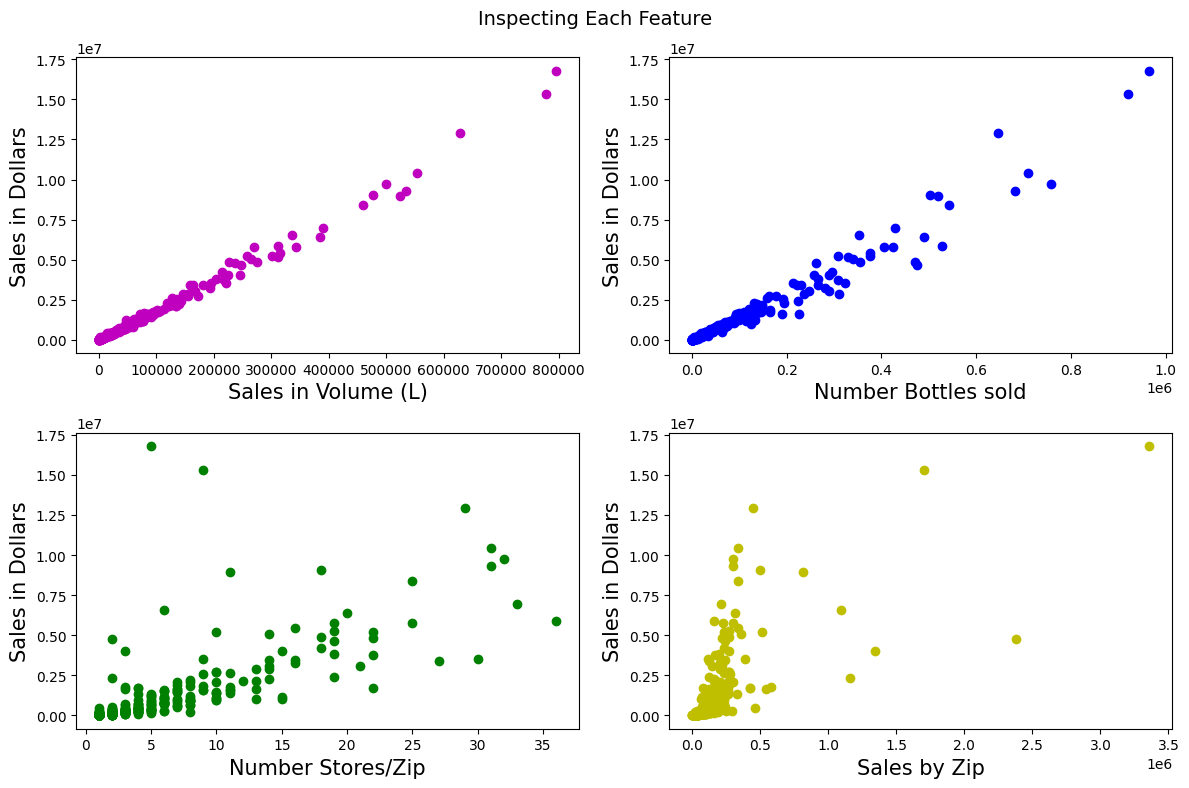

In [59]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
plt.suptitle('Inspecting Each Feature', fontsize = 14)

axes[0,0].plot(df_zip_sales['Volume_Sold_L'],df_zip_sales['Sale_Dollars'],'mo')
axes[0,0].set_ylabel("Sales in Dollars", fontsize = 15)
axes[0,0].set_xlabel("Sales in Volume (L)", fontsize = 15)

axes[0,1].plot(df_zip_sales['Bottles_Sold'],df_zip_sales['Sale_Dollars'],'bo')
axes[0,1].set_ylabel("Sales in Dollars", fontsize = 15)
axes[0,1].set_xlabel("Number Bottles sold", fontsize = 15)

axes[1,0].plot(df_zip_sales['Store_Count'],df_zip_sales['Sale_Dollars'],'go')
axes[1,0].set_ylabel("Sales in Dollars", fontsize = 15)
axes[1,0].set_xlabel("Number Stores/Zip", fontsize = 15)

axes[1,1].plot(df_zip_sales['Sales_by_zip'],df_zip_sales['Sale_Dollars'],'yo')
axes[1,1].set_ylabel("Sales in Dollars", fontsize = 15)
axes[1,1].set_xlabel('Sales by Zip', fontsize = 15)



plt.tight_layout();

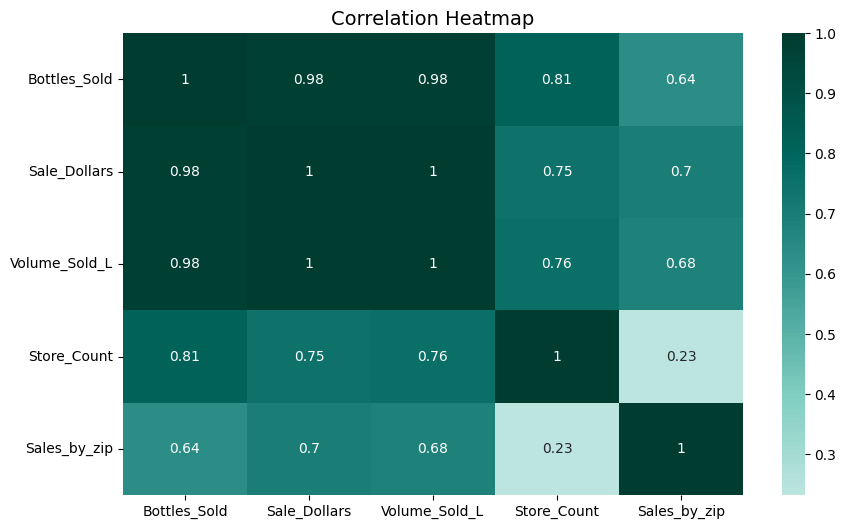

In [60]:
df_correlation = df_zip_sales[['Bottles_Sold','Sale_Dollars', 'Volume_Sold_L', 'Store_Count', 'Sales_by_zip']]
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(df_correlation.corr(), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

In [61]:
# Splitting data into trainig and test data, using k-folds cv to test data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model

In [62]:
X = df_zip_sales.drop(['Zip_Code', 'Sale_Dollars'], axis=1)
y = df_zip_sales['Sale_Dollars']

In [63]:
X

,Bottles_Sold,Volume_Sold_L,Volume_Sold_G,Store_Count,Sales_by_zip
0,1527,981.32,257.78,2,10683.42
1,60781,44009.13,11588.65,5,173111.10
2,3567,1928.81,507.97,1,39305.10
3,6119,5726.24,1508.74,2,48046.93
4,1118,864.12,226.28,1,54170.02
...,...,...,...,...,...
481,288705,161695.50,42590.23,14,218313.48
482,235974,154900.99,40821.21,14,205415.17
483,518939,523878.04,138214.50,11,815180.35
484,798,538.00,141.68,1,9568.65


In [64]:
y

0       21366.85
1      865555.51
2       39305.10
3       96093.85
4       54170.02
         ...    
481   3056388.71
482   2875812.42
483   8966983.80
484      9568.65
485     37256.83
Name: Sale_Dollars, Length: 486, dtype: float64

In [65]:
X = sc.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores

array([-155139.99757554,  -49025.78192782, -371746.31087804,
       -143700.16652698,  -94997.19203105, -260932.48839703,
        -88924.15805781,  -92068.08169122, -193136.17412123,
       -159161.68259565])

In [68]:
print("Average: ", {scores.mean()}) 

Average:  {-160883.20338023713}


In [69]:
y_pred_test_cv = cross_val_predict(model, X_test, y_test,
                         cv = cv, n_jobs = -1) 

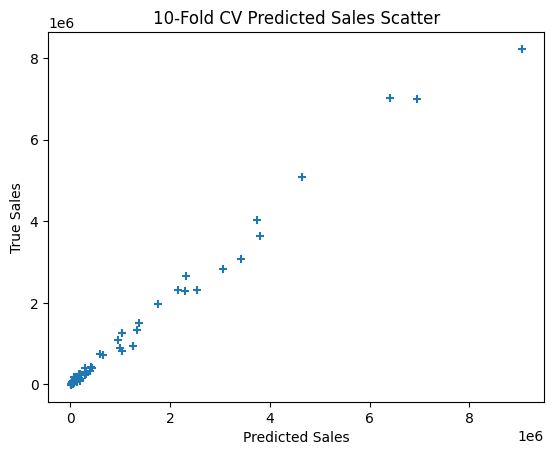

In [70]:
plt.scatter(y_test, y_pred_test_cv, marker='+')
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.title('10-Fold CV Predicted Sales Scatter')
plt.show()

In [71]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_cv)))
print('R2:', metrics.r2_score(y_test, y_pred_test_cv))

RMSE: 146913.87928676736
R2: 0.9907894725342385
